# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.regressionplots import influence_plot

# **QUESTION - 1**

In [ ]:
df=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/ToyotaCorolla.csv',encoding='latin1')
df.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
corolla=df.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
#check type of data
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
# check for null values
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
#check for correlation 
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


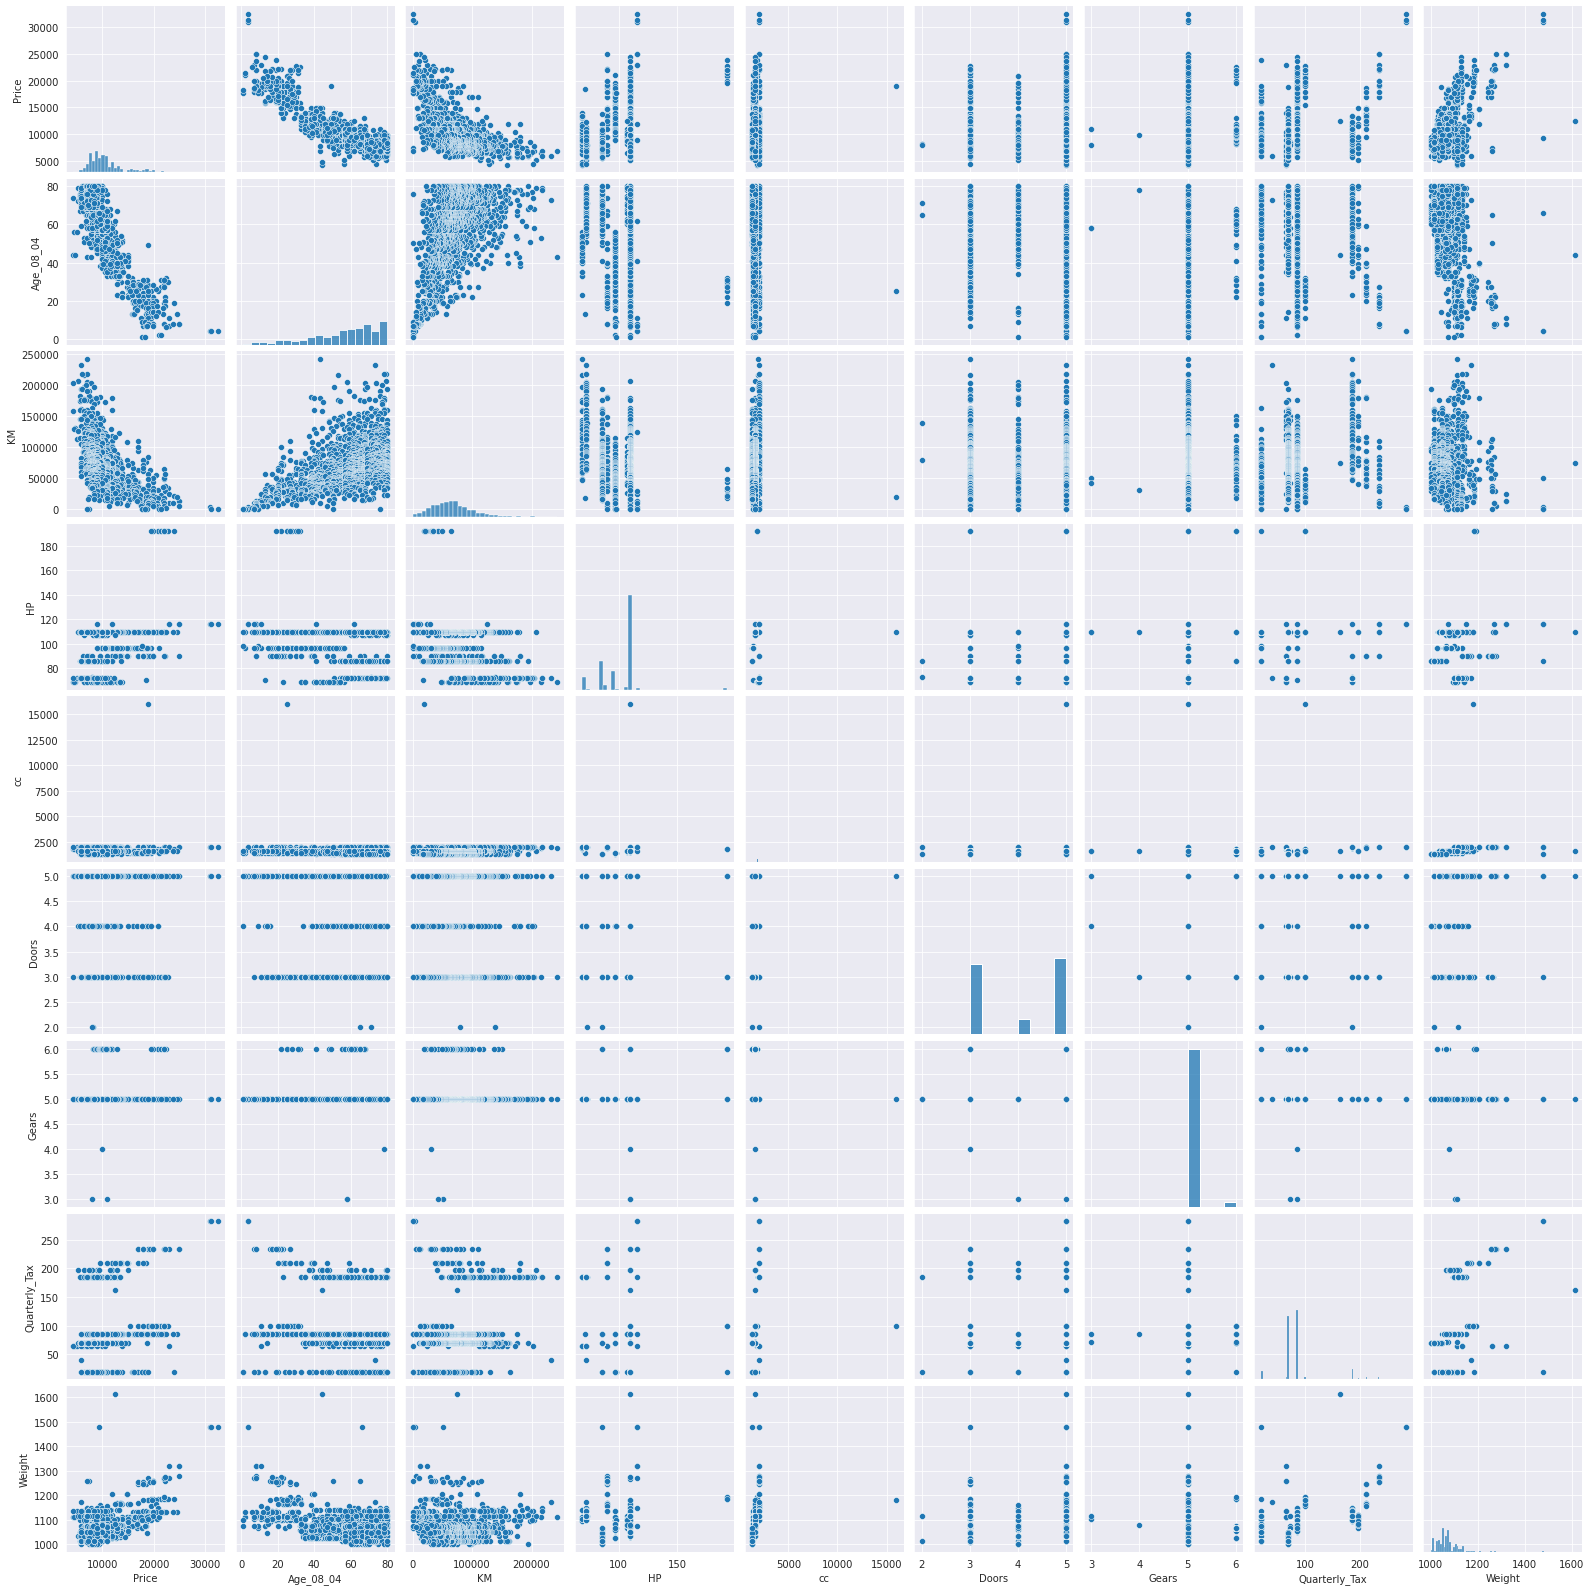

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

In [ ]:
# Build the model
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit()

In [ ]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
# get tvalues and pvalues
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [ ]:
# check the rsquared vaule 
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [ ]:
for i,column in enumerate(corolla):
  model1=smf.ols(f'Price~{column}',data=corolla).fit()
  print(column)
  print('tvalues',model1.tvalues,'\n','pvalues',model1.pvalues)
  print('///////////////////////////////////////////')

Price
tvalues Intercept    5.810051e+00
Price        2.522285e+15
dtype: float64 
 pvalues Intercept    7.682389e-09
Price        0.000000e+00
dtype: float64
///////////////////////////////////////////
Age_08_04
tvalues Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 pvalues Intercept    0.0
Age_08_04    0.0
dtype: float64
///////////////////////////////////////////
KM
tvalues Intercept    88.510378
KM          -26.267601
dtype: float64 
 pvalues Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64
///////////////////////////////////////////
HP
tvalues Intercept     4.803134
HP           12.567862
dtype: float64 
 pvalues Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64
///////////////////////////////////////////
cc
tvalues Intercept    24.694090
cc            4.824822
dtype: float64 
 pvalues Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64
///////////////////////////////////////////
Doors
tvalues Intercept    19.2

In [ ]:
from ssl import VERIFY_CRL_CHECK_LEAF
# check for the VIF
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_HP = 1/(1-rsq_Age_08_04)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_cc=VERIFY_CRL_CHECK_LEAF = 1/(1-rsq_KM) 

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Doors = 1/(1-rsq_KM) 

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Gears = 1/(1-rsq_KM) 

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=corolla).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_KM) 

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Gears',data=corolla).fit().rsquared  
vif_Weight = 1/(1-rsq_KM) 

d1 = {'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.884620
3,cc,1.756905
4,Doors,1.756905
5,Gears,1.756905
6,Quarterly_Tax,1.756905
7,Weight,1.756905


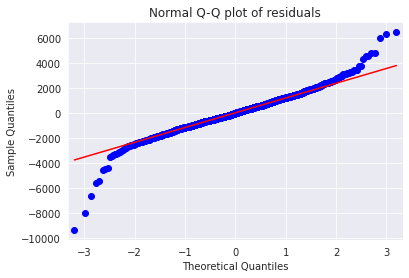

In [ ]:
# draw QQplot
# line = 45 to draw the diagnoal line

import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standerdized_values(vals):
  return(vals-vals.mean())/vals.std()

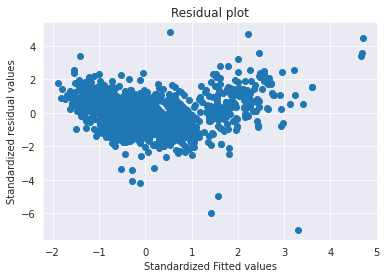

In [ ]:
# draw residual plot

plt.scatter(get_standerdized_values(model.fittedvalues),
            get_standerdized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

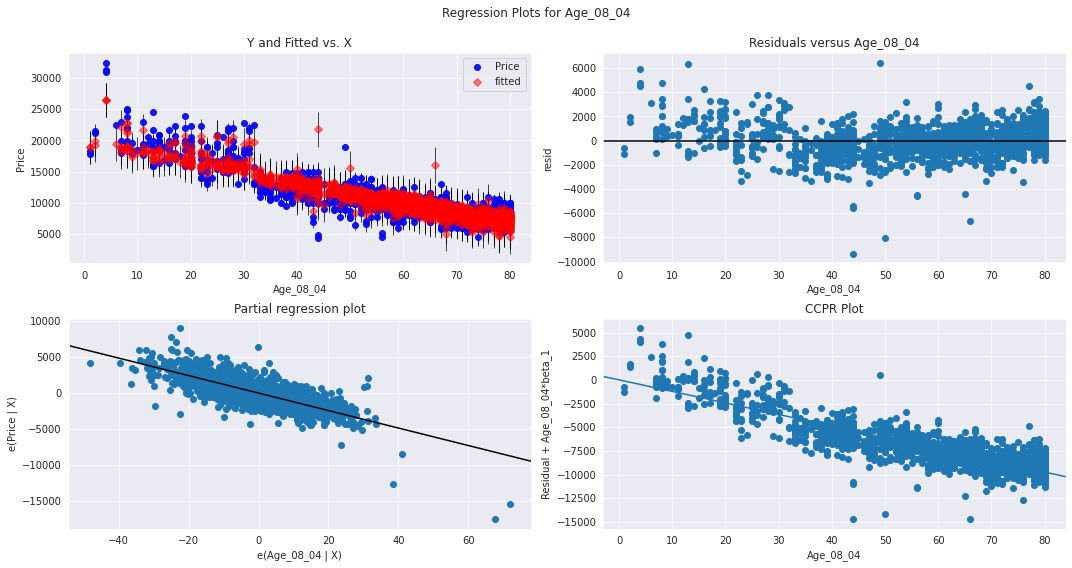

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

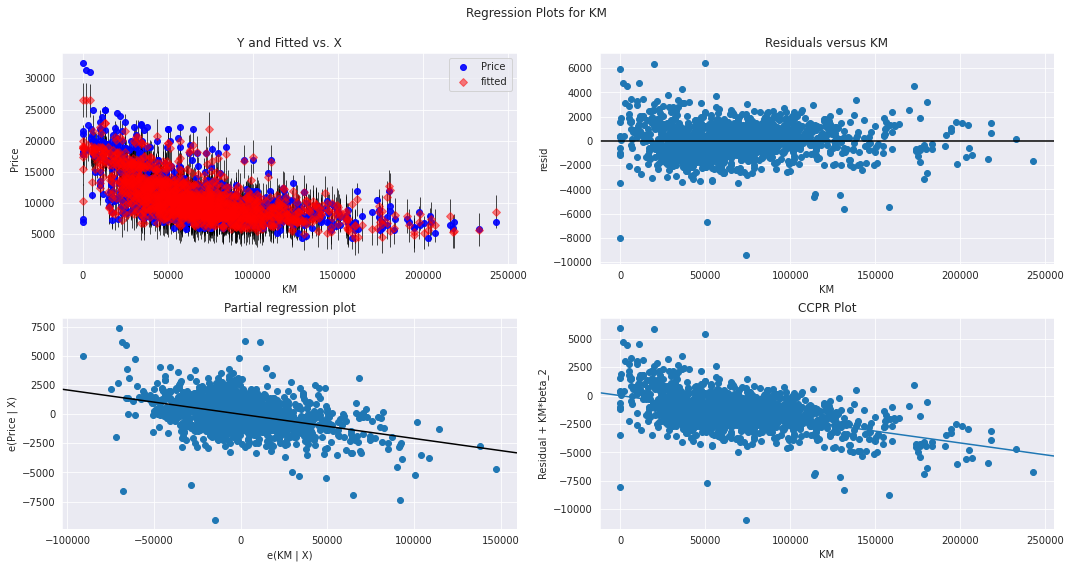

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

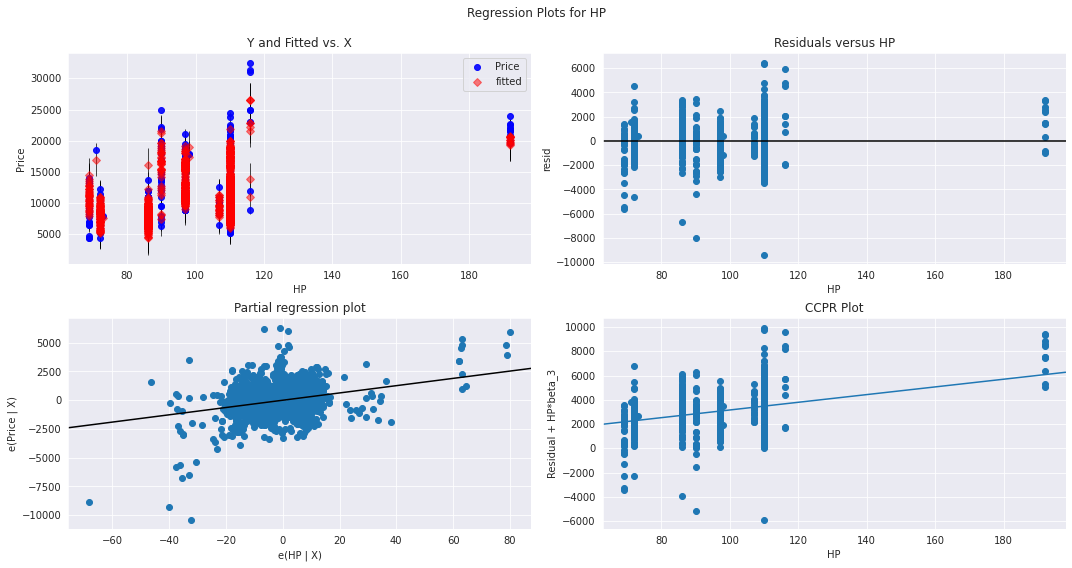

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

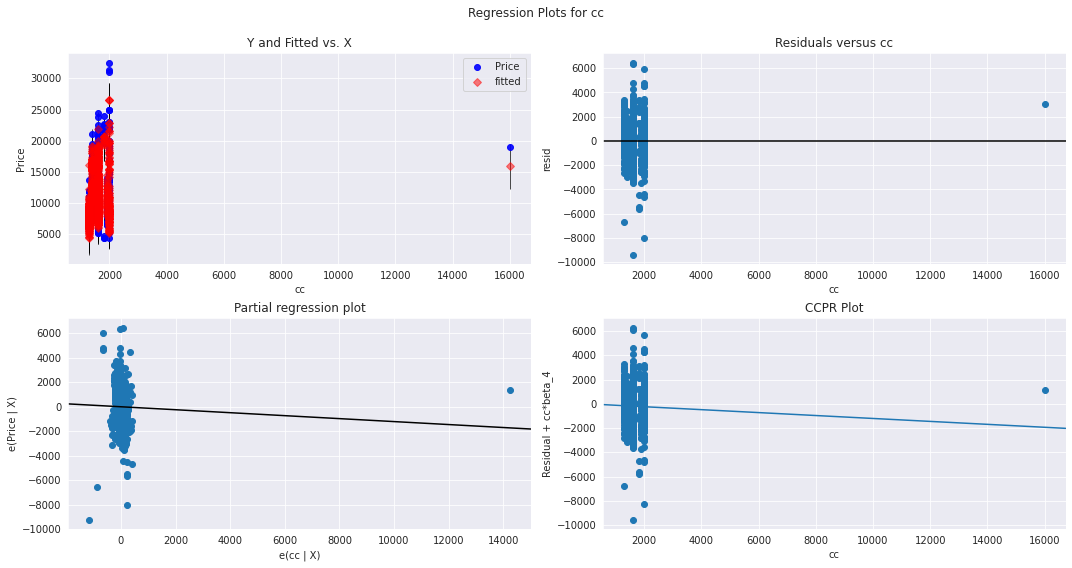

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

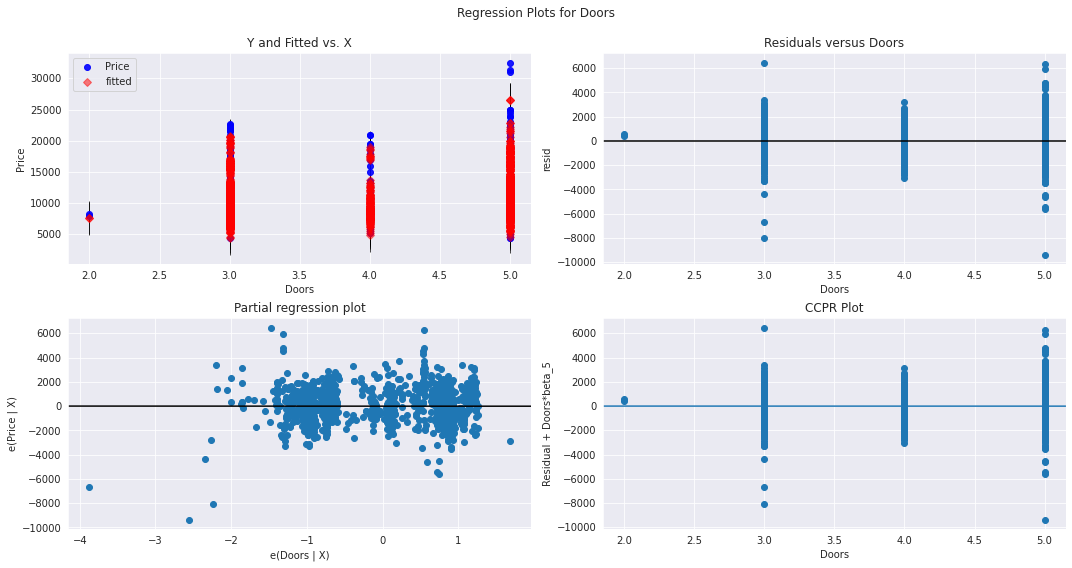

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

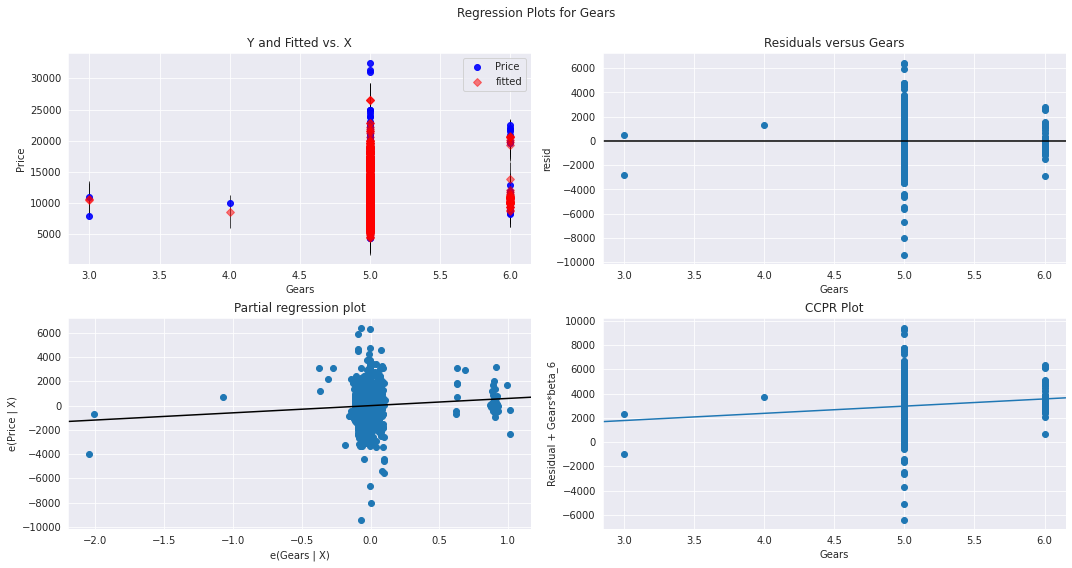

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

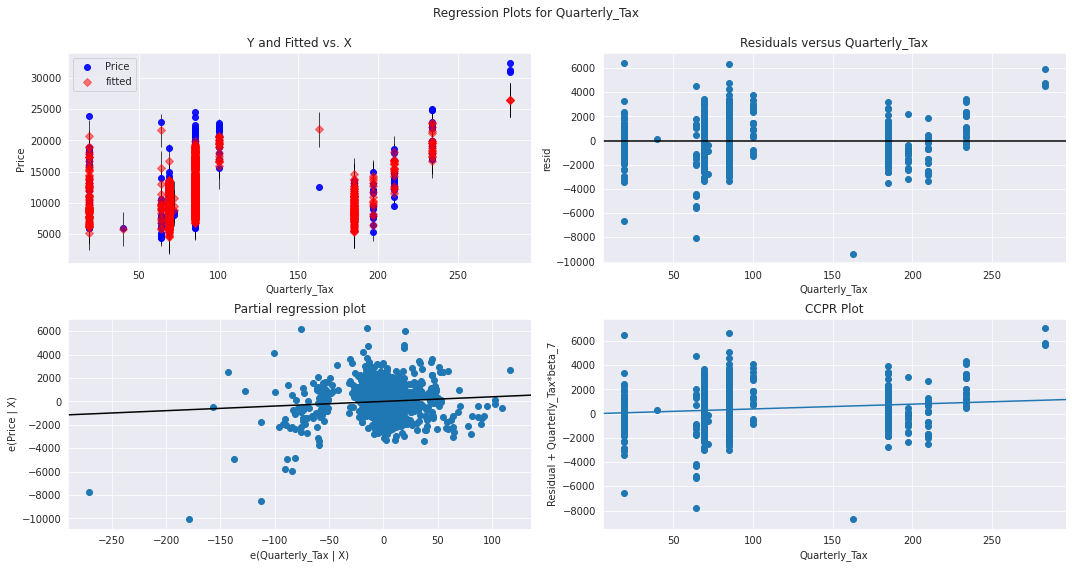

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)

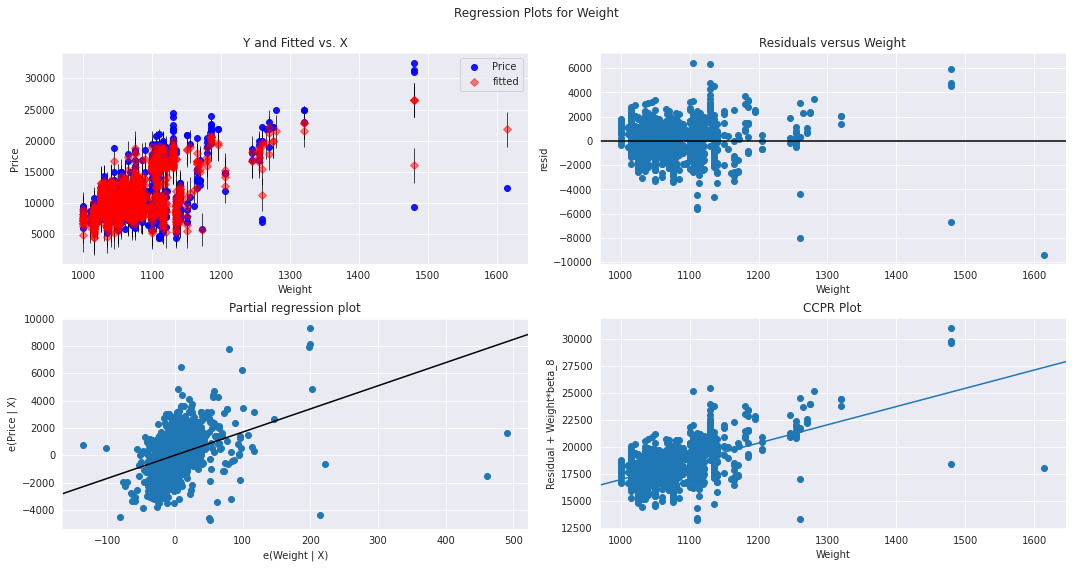

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [ ]:
# check the cooks distance

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

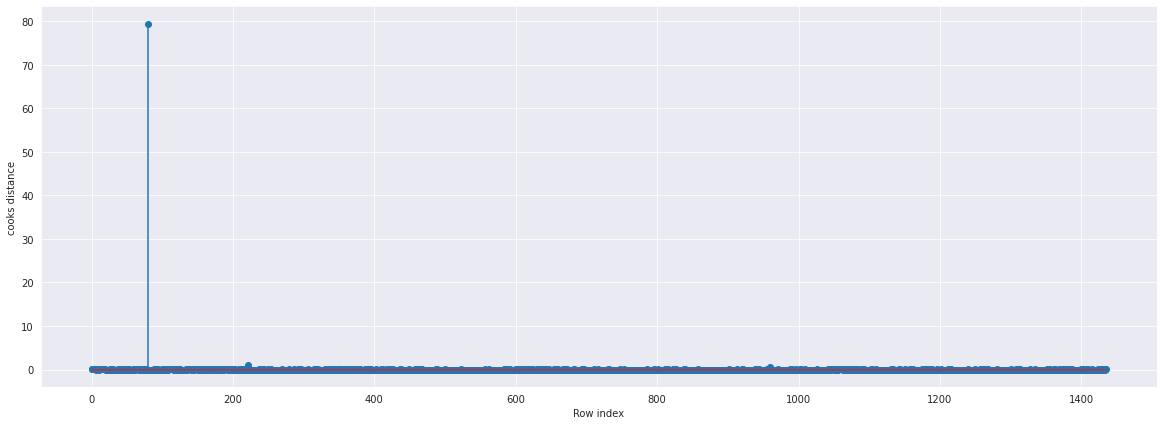

In [ ]:
# Cooks Plot
# We want Cooks distance below '1'
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))


(80, 79.52010624141955)

In [ ]:
k=corolla.shape[1]
n=corolla.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

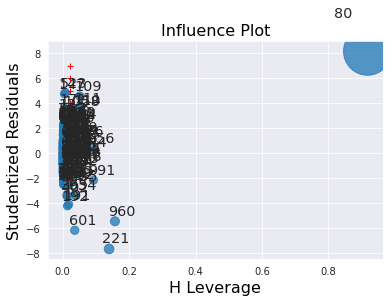

In [ ]:
# Get the influencing values from influence plot


from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,aplha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
corolla[corolla.index.isin([80,960,221,601])]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


In [ ]:
corolla1=corolla.drop(corolla.index[[80,960,221,601]],axis=0).reset_index()


In [ ]:
#improving the model
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla1).fit()

In [ ]:
(model1.rsquared,model1.aic,model1.bic)


(0.8894191849749752, 24399.04559187014, 24446.447037997827)

In [ ]:
from ctypes import c_uint16
model_influence_1 = model1.get_influence()
(c_1, _) = model_influence_1.cooks_distance

In [ ]:
# drop the influencing values 

corolla1=corolla.drop(corolla.index[[80,960,221,601]],axis=0)

In [ ]:
corolla2=corolla1.reset_index()


In [ ]:
corolla3=corolla2.drop(['index'],axis=1)


In [ ]:
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla3).fit()


In [ ]:
model_influence_1 = model2.get_influence()
(c_1, _) = model_influence_1.cooks_distance

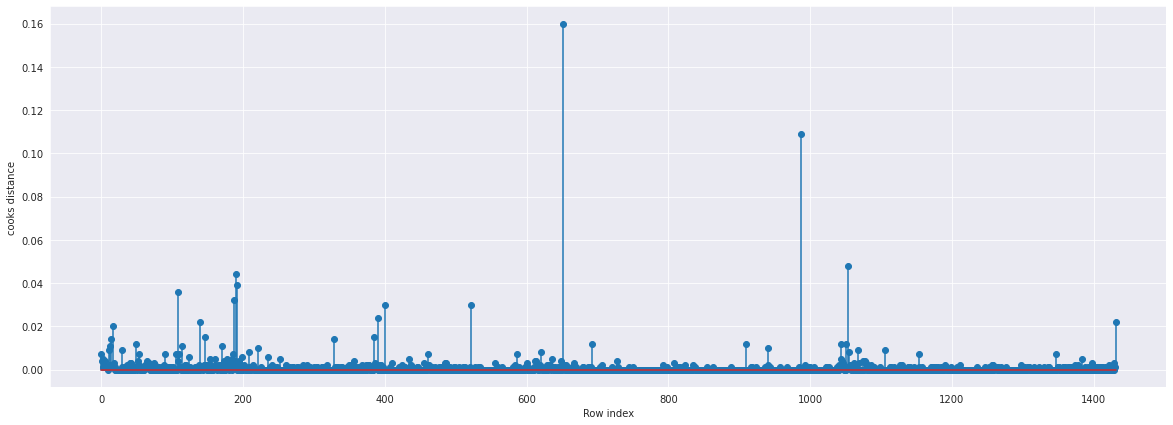

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla3)),np.round(c_1,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [ ]:
(np.argmax(c_1),np.max(c_1))


(651, 0.1603113529891797)

In [ ]:
(model2.rsquared,model2.aic,model2.bic)


(0.8894191849749752, 24399.04559187014, 24446.447037997827)

In [ ]:
print('Predicting Price:')
model2.predict(corolla3)

Predicting Price:


0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64

# **QUESTION - 2**

In [ ]:
startup=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/50_Startups.csv')
startup.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
stp=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
stp.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#check for type of data
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# check for null values
stp.isna().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [ ]:
#check for correlation 
stp.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


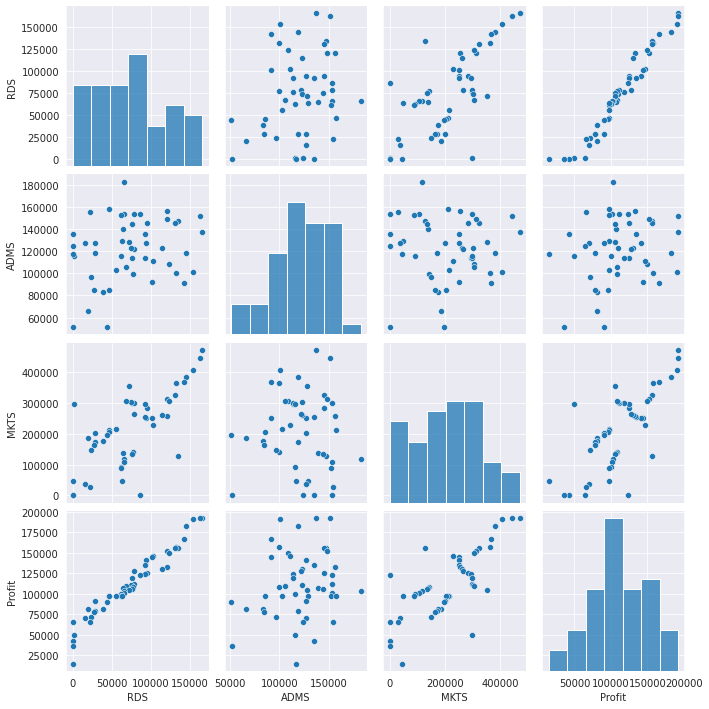

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(stp)

In [ ]:
# Build the model
MDL=smf.ols('Profit~RDS+ADMS+MKTS',data=stp).fit()

In [ ]:
MDL.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [ ]:
# get tvalues and pvalues
print(MDL.tvalues,'\n',MDL.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [ ]:
# check the rsquared vaule 
(MDL.rsquared,MDL.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
for i,column in enumerate(stp):
  MDL1=smf.ols(f'Profit~{column}',data=stp).fit()
  print(column)
  print('tvalues',MDL1.tvalues,'\n','pvalues',MDL1.pvalues)
  print('///////////////////////////////////////////')

RDS
tvalues Intercept    19.320288
RDS          29.151139
dtype: float64 
 pvalues Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64
///////////////////////////////////////////
ADMS
tvalues Intercept    3.040044
ADMS         1.419493
dtype: float64 
 pvalues Intercept    0.003824
ADMS         0.162217
dtype: float64
///////////////////////////////////////////
MKTS
tvalues Intercept    7.808356
MKTS         7.802657
dtype: float64 
 pvalues Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64
///////////////////////////////////////////
State
tvalues Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 pvalues Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64
///////////////////////////////////////////
Profit
tvalues Intercept    2.359296e+00
Profit       2.829853e+15
dtype: float64 
 pvalues Intercept    0.022426
Profit       0.000000

In [ ]:
from ssl import VERIFY_CRL_CHECK_LEAF
# check for the VIF
rsq_RDS = smf.ols('RDS~ADMS+MKTS',data=stp).fit().rsquared  
vif_RDS = 1/(1-rsq_RDS)

rsq_ADMS= smf.ols('ADMS~RDS+MKTS',data=stp).fit().rsquared  
vif_ADMS = 1/(1-rsq_ADMS) 

rsq_MKTS = smf.ols('MKTS~ADMS+RDS',data=stp).fit().rsquared  
vif_MKTS = 1/(1-rsq_MKTS) 
d1 = {'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_RDS,vif_ADMS,vif_MKTS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


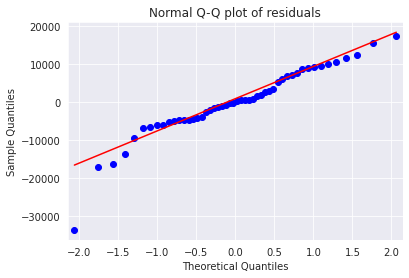

In [ ]:
# draw QQplot
# line = 45 to draw the diagnoal line

import statsmodels.api as sm
sm.qqplot(MDL.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standerdized_values(vals):
  return(vals-vals.mean())/vals.std()

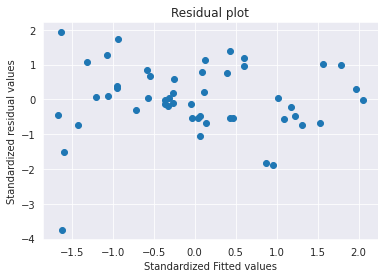

In [ ]:
# draw residual plot

plt.scatter(get_standerdized_values(MDL.fittedvalues),
            get_standerdized_values(MDL.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

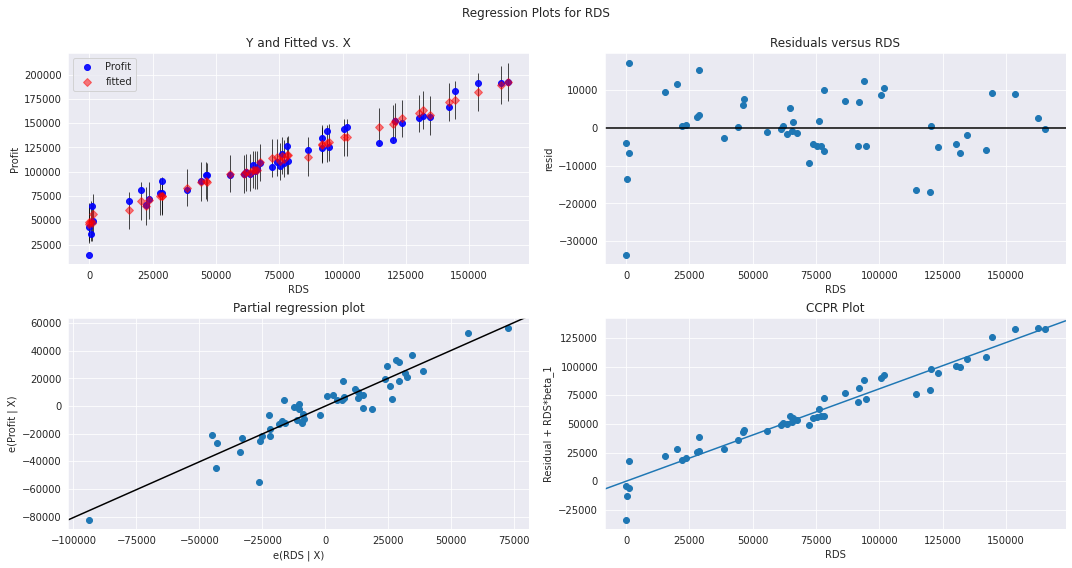

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,'RDS',fig=fig)
plt.show()

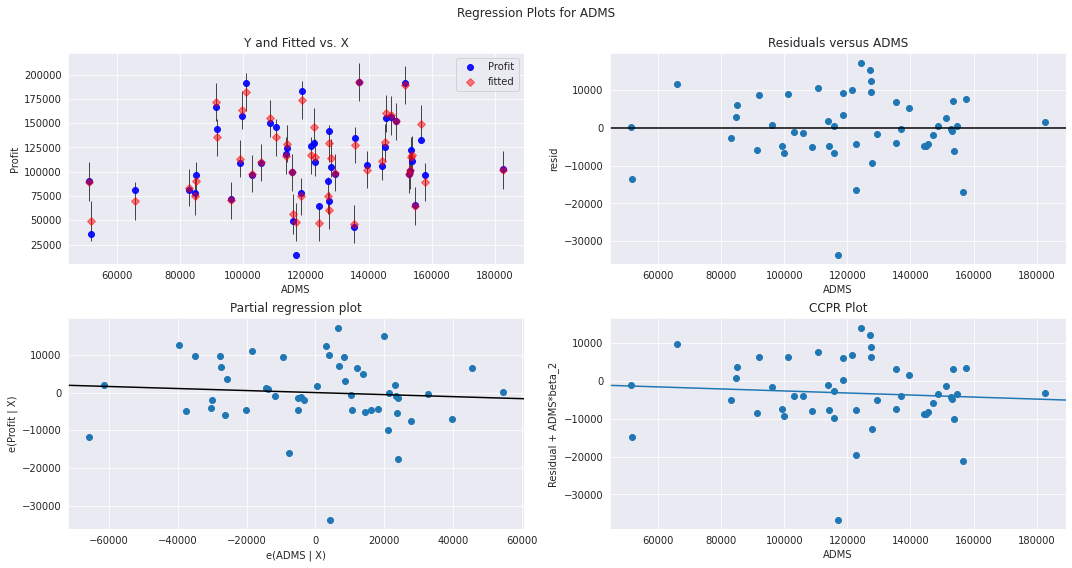

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,"ADMS",fig=fig)
plt.show()

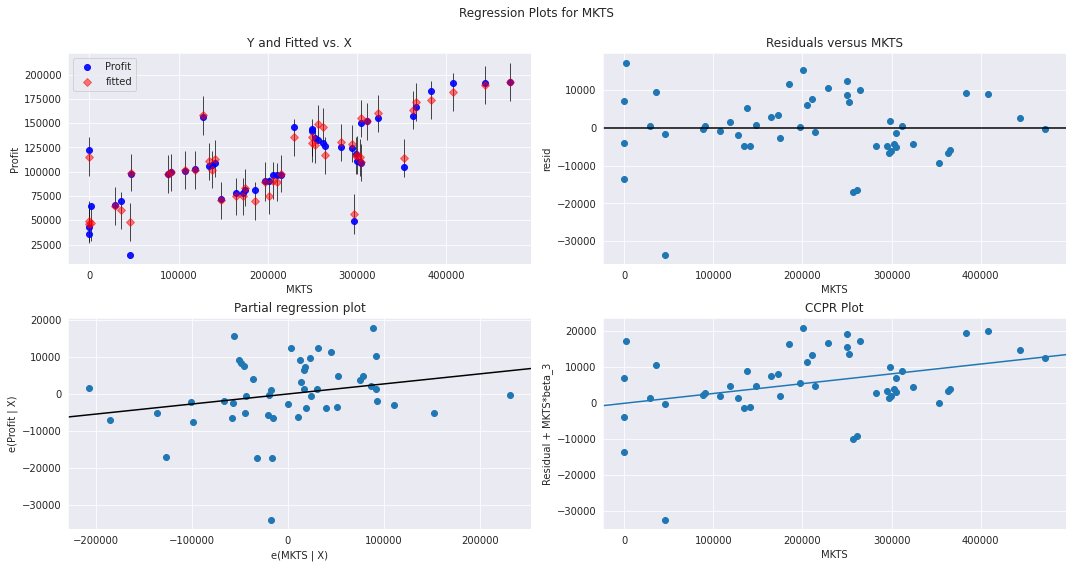

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,"MKTS",fig=fig)
plt.show()

In [ ]:
# check the cooks distance

MDL_influence=MDL.get_influence()
(P,_)=MDL_influence.cooks_distance

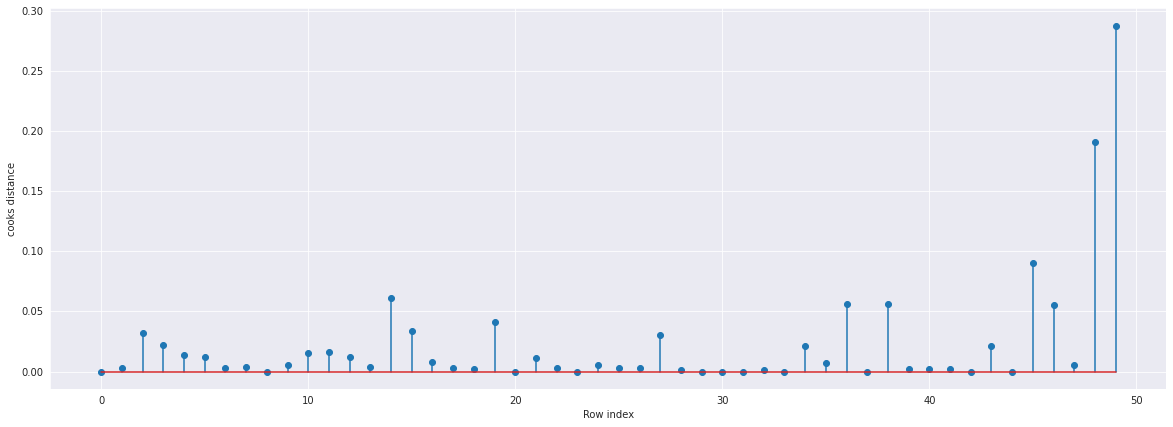

In [ ]:
# Cooks Plot
# We want Cooks distance below '1'
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stp)),np.round(P,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [ ]:
(np.argmax(P),np.max(P))


(49, 0.2880822927543272)

In [ ]:
k=stp.shape[1]
n=stp.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

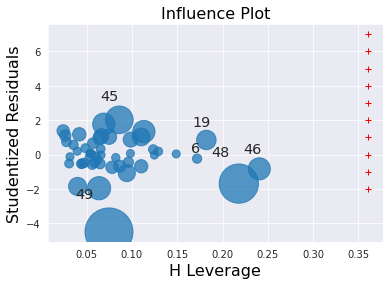

In [ ]:
# Get the influencing values from influence plot


from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(MDL,aplha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
(MDL.rsquared,MDL.aic,MDL.bic)


(0.9507459940683246, 1058.7714985998055, 1066.419590621518)

# *****************OR
# Model Deletion Diagnostics and Final Model**

In [ ]:
MDL2=smf.ols("Profit~RDS+ADMS+MKTS",data=stp).fit()


In [ ]:
while MDL2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        MDL2=smf.ols("Profit~RDS+ADMS+MKTS",data=stp).fit()
        (c,_)=MDL2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        stp=stp.drop(stp.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        stp
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=stp).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129848
Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improve

In [ ]:
final_model.rsquared


0.9882757054424702

In [ ]:
final_model.predict(stp)


0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# Table containing R^2 value for each prepared model

In [ ]:
d2={'Prep_Models':['MDL','Final_Model'],'Rsquared':[MDL.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,MDL,0.950746
1,Final_Model,0.988276
